<a href="https://colab.research.google.com/github/vujjiniashrith/IOT_security/blob/main/Recurrent_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.impute import KNNImputer
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, RepeatVector, Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel('combined_dataset.xlsx')

In [ ]:
columns = df.columns

In [ ]:
print(columns)

Index(['SpO2', 'HR', 'PULSE', 'RESP', 'ABP1', 'ABP2', 'ABP3', 'INOP_PLETH',
       'INOP_SpO2', 'INOP_RESP', 'INOP_NOISE', 'ALARM'],
      dtype='object')


In [ ]:
columns_to_delete = [ 'INOP_PLETH',
       'INOP_SpO2', 'INOP_RESP', 'INOP_NOISE', 'ALARM']

In [ ]:
df.drop(columns=columns_to_delete, inplace=True)

In [ ]:
print(df.columns)

Index(['SpO2', 'HR', 'PULSE', 'RESP', 'ABP1', 'ABP2', 'ABP3'], dtype='object')


In [ ]:
df = df.loc[(df != 0).all(axis=1)]

In [ ]:
df.shape

(79952, 7)

In [ ]:
df.head()

,SpO2,HR,PULSE,RESP,ABP1,ABP2,ABP3
0,94.0,71.0,71.0,19.0,69.0,113.0,50.0
1,94.0,71.0,71.0,19.0,69.0,113.0,50.0
2,94.0,71.0,71.0,17.0,70.0,113.0,51.0
3,94.0,71.0,71.0,17.0,69.0,113.0,51.0
4,94.0,71.0,71.0,17.0,69.0,113.0,50.0


In [ ]:
df.dropna(inplace=True)

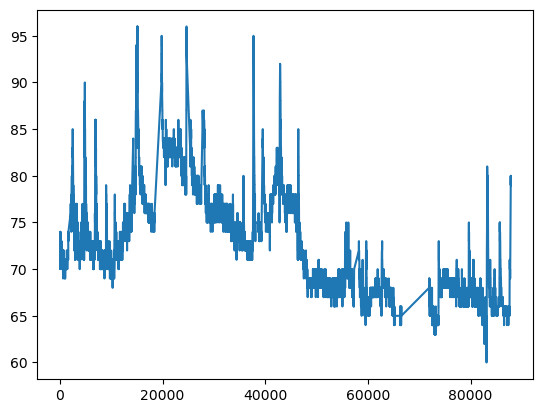

In [ ]:
plt.plot(df.HR)

In [ ]:
null_counts = df.isnull().sum()

In [ ]:
null_counts

SpO2     0
HR       0
PULSE    0
RESP     0
ABP1     0
ABP2     0
ABP3     0
dtype: int64

In [ ]:
imputer = KNNImputer(n_neighbors = 3)

In [ ]:
#df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
#null_counts = df_imputed.isnull().sum()

In [ ]:
print(null_counts)

SpO2     0
HR       0
PULSE    0
RESP     0
ABP1     0
ABP2     0
ABP3     0
dtype: int64


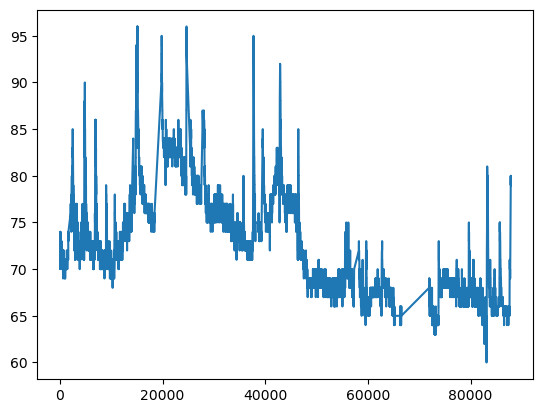

In [ ]:
plt.plot(df.HR)

<AxesSubplot:>

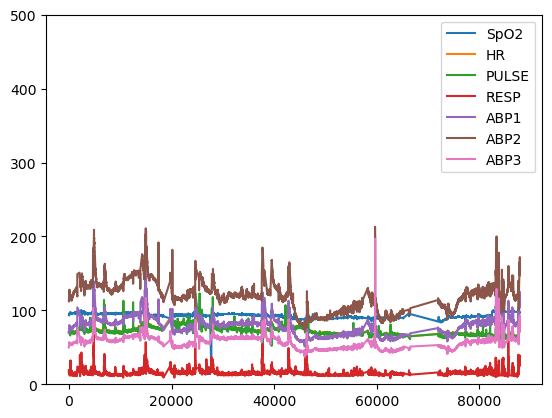

In [ ]:
df.plot(ylim=(0, 500), kind='line')

In [ ]:
scaler = StandardScaler()

In [ ]:
data = scaler.fit_transform(df)

In [ ]:
data1 = pd.DataFrame(data)

,0,1,2,3,4,5,6
0,0.326212,-0.308918,-0.212088,1.040896,-0.815191,-0.299175,-0.836360
1,0.326212,-0.308918,-0.212088,1.040896,-0.815191,-0.299175,-0.836360
2,0.326212,-0.308918,-0.212088,0.478651,-0.729935,-0.299175,-0.710017
3,0.326212,-0.308918,-0.212088,0.478651,-0.815191,-0.299175,-0.710017
4,0.326212,-0.308918,-0.212088,0.478651,-0.815191,-0.299175,-0.836360


In [ ]:
lookback = 200
sequences = []

In [ ]:
for i in range(len(data)-lookback+1):
    sequence = data[i:i+lookback]
    sequences.append(sequence)

In [ ]:
sequences = np.array(sequences)

In [ ]:
input_shape = (lookback,7)
latent_dim = 10

In [ ]:
input_layer = Input(shape = input_shape)
encoder = LSTM(latent_dim)(input_layer)

decoder = RepeatVector(lookback)(encoder)
decoder = LSTM(7, return_sequences=True)(decoder)

autoencoder = keras.Model(input_layer, decoder)
autoencoder.compile(optimizer ='adam',loss = 'mean_squared_error')

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 7)]          0         
                                                                 
 lstm_4 (LSTM)               (None, 10)                720       
                                                                 
 repeat_vector_2 (RepeatVect  (None, 200, 10)          0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 200, 7)            504       
                                                                 
Total params: 1,224
Trainable params: 1,224
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(sequences, sequences, epochs=10, batch_size=320)

Epoch 1/10
235/235 [==============================] - 29s 122ms/step - loss: 0.4902
Epoch 2/10
235/235 [==============================] - 37s 156ms/step - loss: 0.3915
Epoch 3/10
 72/235 [========>.....................] - ETA: 29s - loss: 0.3621

In [ ]:
decoded_data = autoencoder.predict(sequences)
encoded_data = autoencoder.predict(decoded_data)

In [ ]:
encoded_data.shape

(75181, 200, 7)

In [ ]:
last_values = encoded_data[:, -1, :]

In [ ]:
reshaped_data = last_values.reshape(-1, last_values.shape[-1])

In [ ]:
reshaped_data.shape

(75181, 7)

In [ ]:
original_data = scaler.inverse_transform(reshaped_data)

In [ ]:
original_df = pd.DataFrame(original_data, columns=df.columns)

In [ ]:
original_df.head()

,SpO2,HR,PULSE,RESP,ABP1,ABP2,ABP3
0,96.104271,71.853485,70.667633,14.009734,78.833229,121.275589,55.781441
1,96.105347,71.856590,70.667130,14.009605,78.834404,121.250496,55.791618
2,96.103256,71.915581,70.759140,13.966429,78.929855,121.500511,55.882908
3,96.102226,71.920639,70.766159,13.968922,78.931206,121.517494,55.883526
4,96.102165,71.923508,70.769363,13.969279,78.933975,121.519058,55.889530


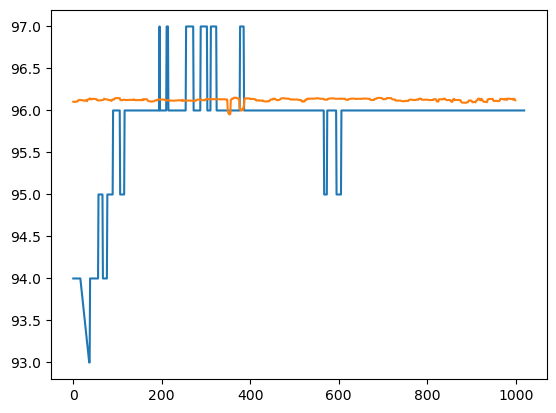

In [ ]:
plt.plot(df.SpO2[:1000])
plt.plot(original_df.SpO2[:1000])